# Labo 11
Détection de caractéristiques

In [2]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage import data
from skimage.transform import resize
from scipy.signal import correlate2d

## Exercice 1 - Feature matching
Identifier un patch dans `img1` et l'associer à `img2` en utilisant la somme des différences carrées (SSD).

img 1 min : 0.0
img 2 min : 860489.6875


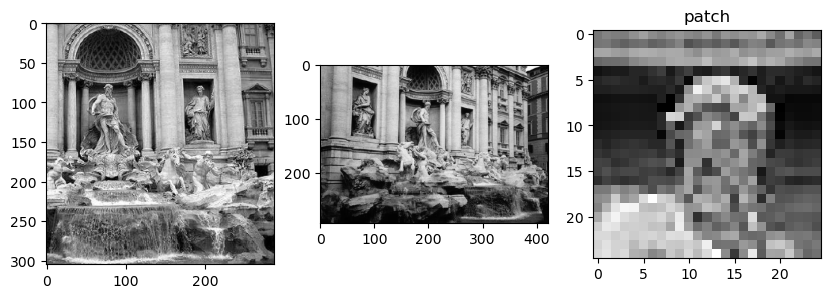

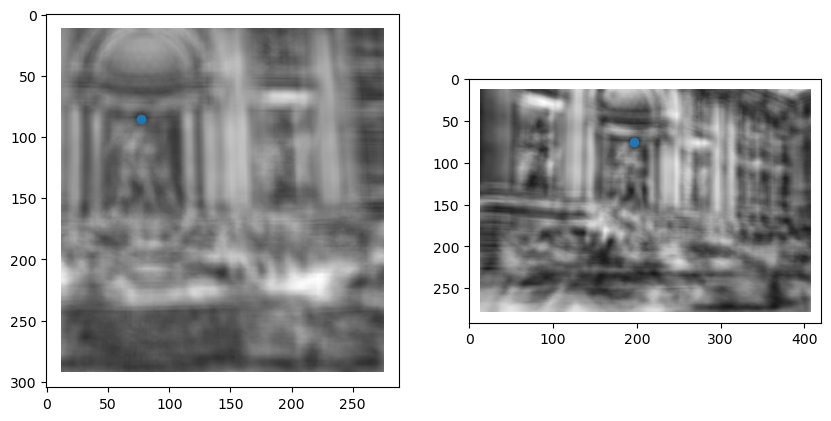

In [13]:
img1 = iio.imread('statue1.PNG')
img2 = iio.imread('statue2.PNG')
img1 = np.mean(img1, axis=2)
img2 = np.mean(img2, axis=2)

plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(img1, cmap='gray')
plt.subplot(132); plt.imshow(img2, cmap='gray')

y = 73; x = 65
patch = img1[y:y+25, x:x+25]
plt.subplot(133); plt.imshow(patch, cmap='gray'); plt.title('patch')

def ssd(patch_a, patch_b) -> float:
    return np.sum((patch_a - patch_b)**2)

def apply_ssd(img, patch, step: int = 1) -> np.array:
    result = np.full_like(img, np.inf)
    pad = patch.shape[0] // 2

    for i in range(pad, img.shape[0] - pad):
        for j in range(pad, img.shape[1] - pad):
            p = img[i-pad:i+patch.shape[0]-pad, j-pad:j+patch.shape[1]-pad]
            ssd_res = ssd(patch, p)
            result[i,j] = ssd_res
    
    return result

img1_ssd = apply_ssd(img1, patch)
img2_ssd = apply_ssd(img2, patch)

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img1_ssd, cmap='gray')
min_img1 = np.min(img1_ssd)
print(f'img 1 min : {min_img1}')
coord_1 = np.where(img1_ssd == min_img1)
plt.scatter(coord_1[1], coord_1[0])


plt.subplot(122); plt.imshow(img2_ssd, cmap='gray')
min_img2 = np.min(img2_ssd)
print(f'img 2 min : {min_img2}')
coord_2 = np.where(img2_ssd == min_img2)
plt.scatter(coord_2[1], coord_2[0])


## Exercice 2 - Sift example
Exemple Sift avec opencv
https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

J'aurais bien voulu le faire, mais il faut payer pour pouvoir utiliser l'algo Sift
```
Both SIFT and SURF authors require license fees for usage of their original algorithms
```

## Exercice 3 - Descripteur de Fourier
Aller chercher le contour de l'objet dans `img` en utilisant les descripteurs de Fourier

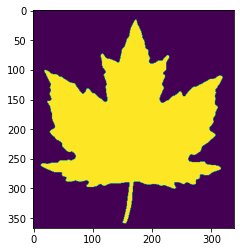

In [ ]:
img = iio.imread('leaf.png').mean(axis=2)
img[img <= img.min()] = 0
img[img > 0] = 1
img.astype(np.int8)

plt.imshow(img); plt.show()

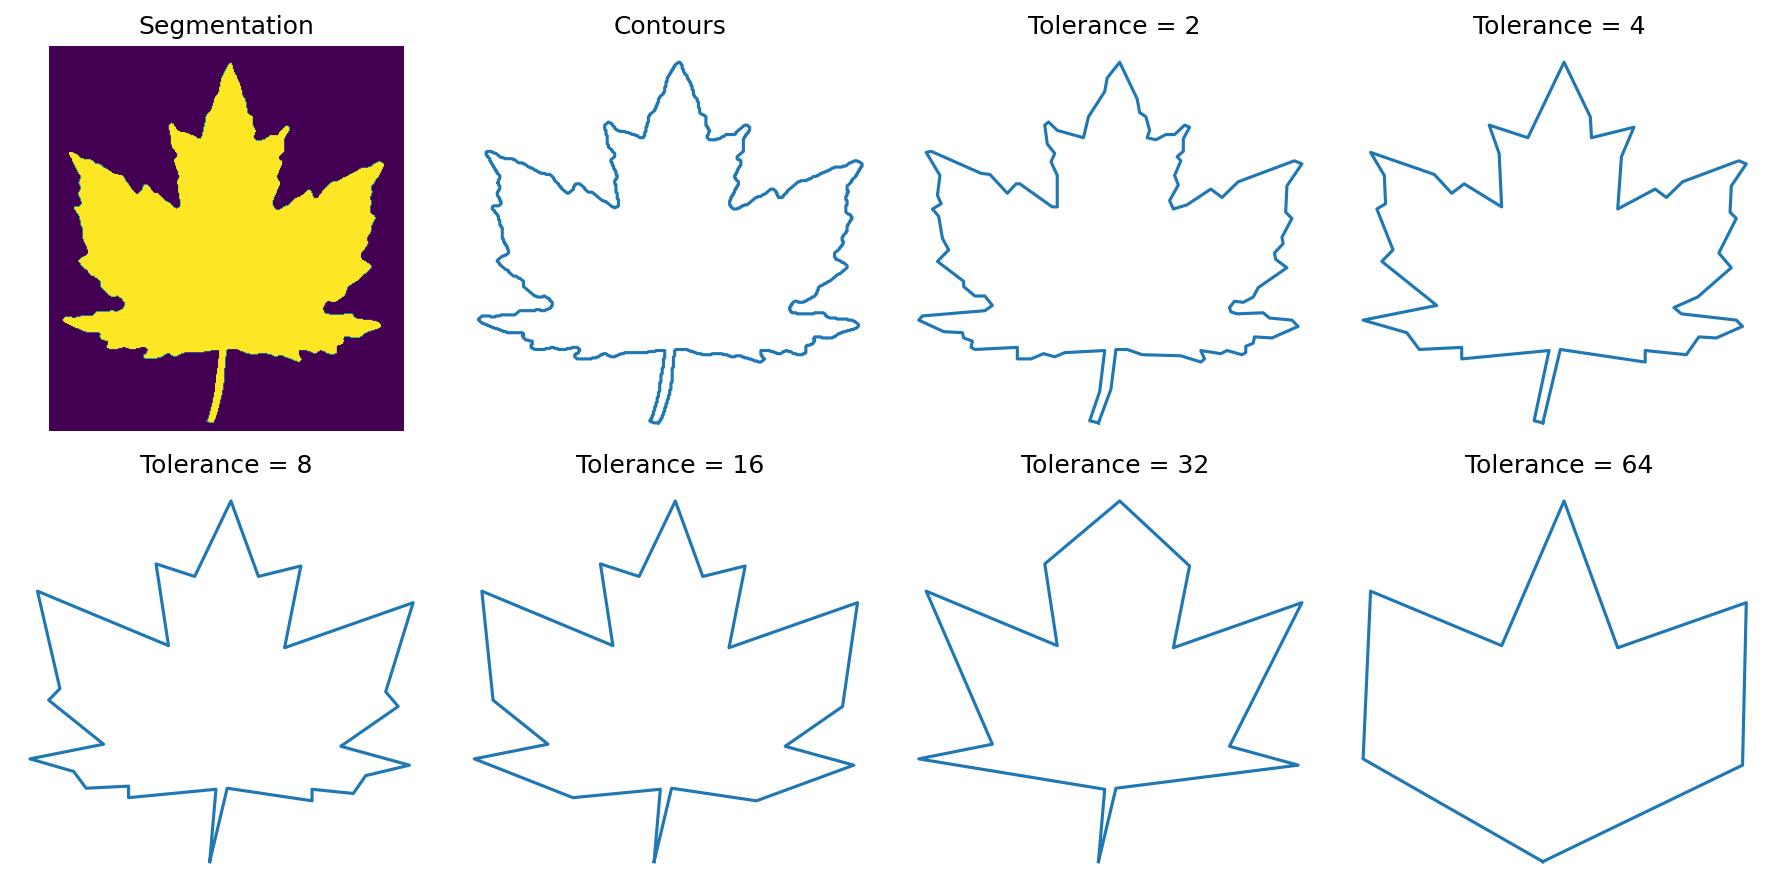

In [ ]:
# Extraction de la frontière
tolerances = [2,4,8,16,32,64]
#measure...
c = ...

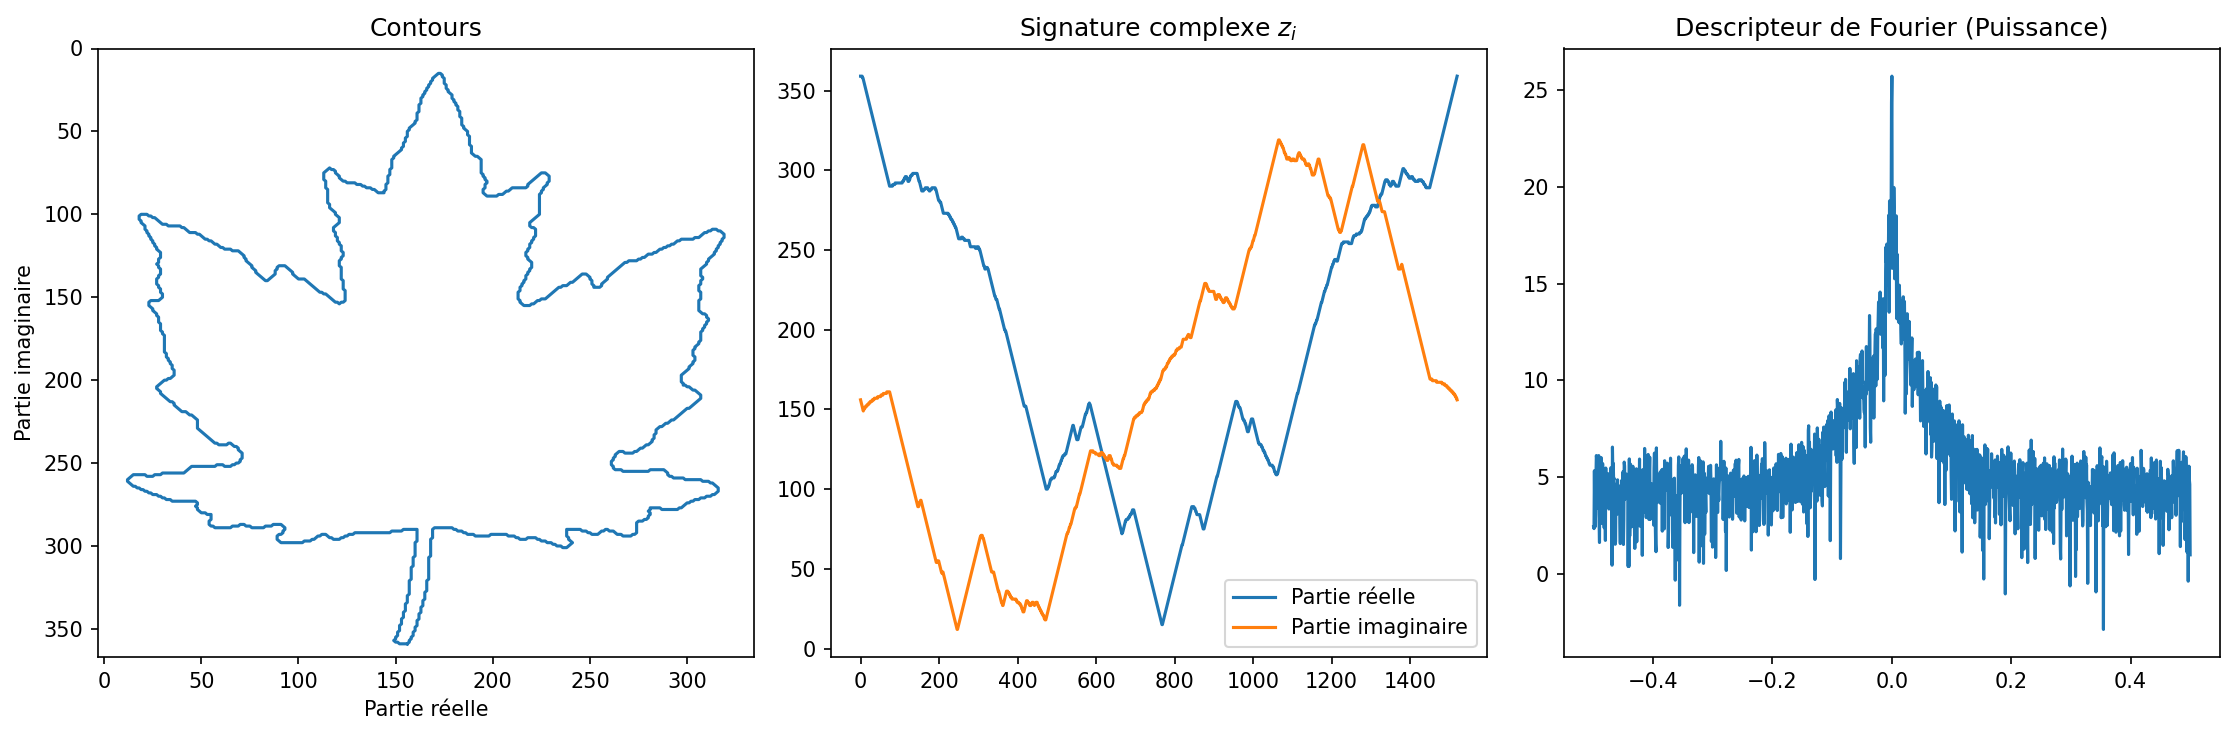

In [ ]:
# Descripteur de Fourier
z = c[:,0] + 1j * c[:,1]
...

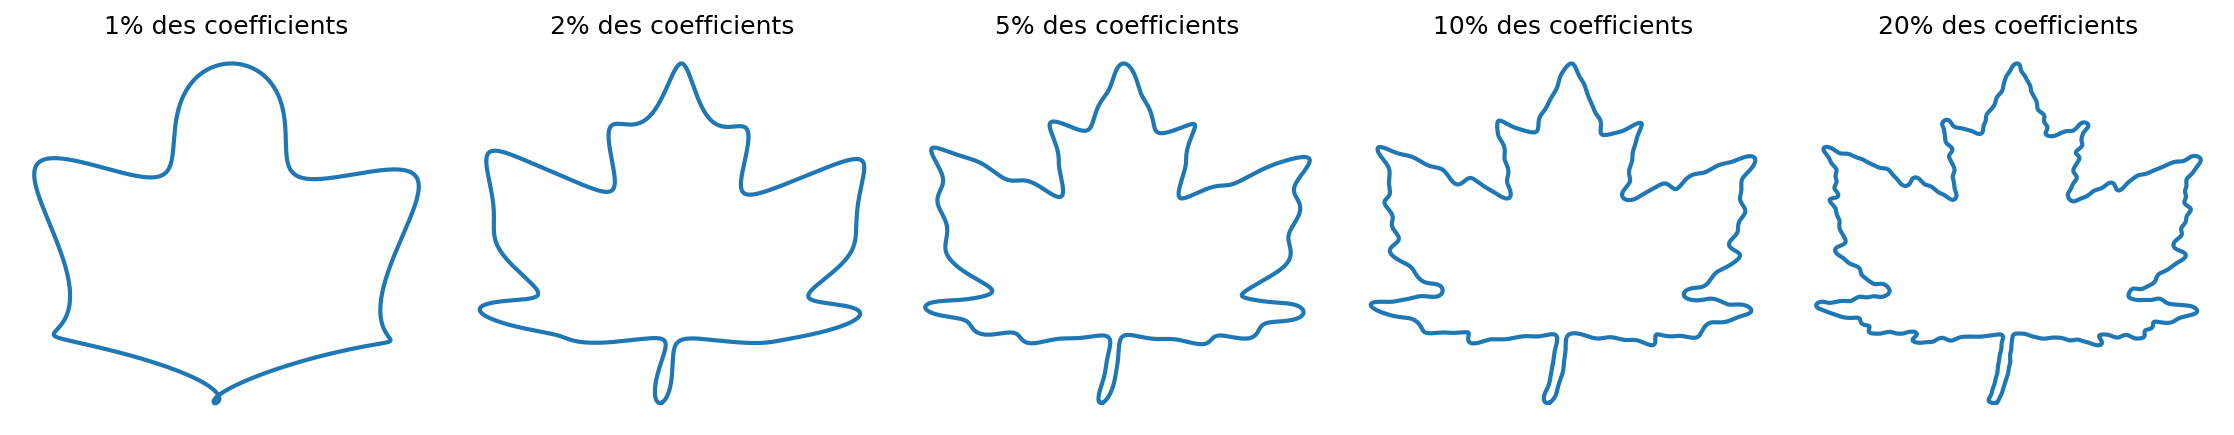

In [153]:
# Approximations
seuils = [0.005,0.01,0.025,0.05,0.1]
...